In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ursse.hydra_harp_file_reader import HydraHarpFile
from ursse.path_assistant import PathAssistant as pa
import statsmodels.api as sm
import valstore as vt
shift = pa("shift_02_28_2020")

In [2]:
f = HydraHarpFile(shift.get_time_stamp_file_path("32el_000.ptu"))

In [10]:
trigTimes = f.TimeTagArr[f.ChannelArr == 0]

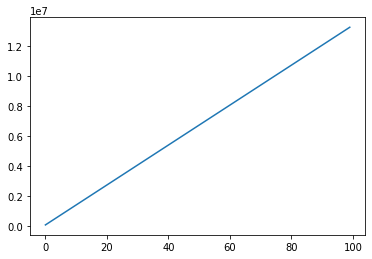

In [12]:
plt.plot(trigTimes[:100])

In [16]:
periods = np.diff(trigTimes)

(array([2.7100000e+02, 2.1357000e+04, 8.1057100e+05, 8.9810870e+06,
        3.2109777e+07, 2.7204779e+07, 5.5114090e+06, 3.7354500e+05,
        7.8840000e+03, 9.7000000e+01]),
 array([133210. , 133227.7, 133245.4, 133263.1, 133280.8, 133298.5,
        133316.2, 133333.9, 133351.6, 133369.3, 133387. ]),
 <a list of 10 Patch objects>)

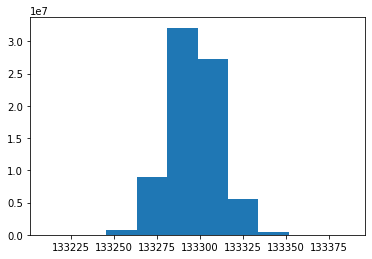

In [17]:
plt.hist(periods)

In [19]:
trigger_jitter = np.std(periods)
trigger_jitter

14.263992116237903

In [24]:
vt.newval("IotaClockJitter", trigger_jitter, "{:.0f}", "ps")

In [20]:
res = sm.OLS(trigTimes, sm.add_constant(np.arange(len(trigTimes)))).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.584e+25
Date:                Wed, 17 Mar 2021   Prob (F-statistic):               0.00
Time:                        18:32:41   Log-Likelihood:            -7.6255e+08
No. Observations:            75020778   AIC:                         1.525e+09
Df Residuals:                75020776   BIC:                         1.525e+09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.127e+04      1.451   2.16e+04      0.000    3.13e+04    3.13e+04
x1          1.333e+05   3.35e-08   3.98e+12      0.000    1.33e+05    1.33e+05
==============================================================================
Omnibus:                   872850.337   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           884968.668
Skew:                           0.255   Prob(JB):                         0.00
Kurtosis:                       2.847   Cond. No.                     8.66e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.66e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
res.params

array([ 31272.57920953, 133296.40657556])